<a href="https://colab.research.google.com/github/kazimovmirkazim/Computer-Vision/blob/main/Pizza_steak_computer_vision_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2025-07-21 15:43:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   314MB/s    in 0.3s    

2025-07-21 15:43:23 (314 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os
for dirpath,dirnames,filenames in  os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and  {len(filenames)} images in {dirpath}.')

There are 2 directories and  0 images in pizza_steak.
There are 2 directories and  0 images in pizza_steak/train.
There are 0 directories and  750 images in pizza_steak/train/pizza.
There are 0 directories and  750 images in pizza_steak/train/steak.
There are 2 directories and  0 images in pizza_steak/test.
There are 0 directories and  250 images in pizza_steak/test/pizza.
There are 0 directories and  250 images in pizza_steak/test/steak.


In [ ]:
for i in os.walk ('pizza_steak'):
  print(i)

('pizza_steak', ['train', 'test'], [])
('pizza_steak/train', ['pizza', 'steak'], [])
('pizza_steak/train/pizza', [], ['132484.jpg', '2967846.jpg', '2155475.jpg', '269396.jpg', '1870865.jpg', '3864383.jpg', '413710.jpg', '2253670.jpg', '3653528.jpg', '1468795.jpg', '1705747.jpg', '2577377.jpg', '1157438.jpg', '3555299.jpg', '138855.jpg', '2035248.jpg', '3913912.jpg', '721383.jpg', '1947572.jpg', '3745884.jpg', '3281494.jpg', '1944600.jpg', '1110966.jpg', '2502234.jpg', '3063955.jpg', '979998.jpg', '3614525.jpg', '3767723.jpg', '244505.jpg', '598381.jpg', '3473991.jpg', '545561.jpg', '899959.jpg', '349946.jpg', '111051.jpg', '3314535.jpg', '2602611.jpg', '1888911.jpg', '271592.jpg', '2667244.jpg', '704161.jpg', '61822.jpg', '2959665.jpg', '2148129.jpg', '271675.jpg', '13983.jpg', '3185774.jpg', '1284978.jpg', '1907713.jpg', '893644.jpg', '741883.jpg', '332231.jpg', '768276.jpg', '670201.jpg', '3871666.jpg', '1107714.jpg', '271779.jpg', '2126709.jpg', '3493457.jpg', '1234172.jpg', '243206

In [ ]:
os.listdir('pizza_steak/train/steak')

['1658186.jpg',
 '3750472.jpg',
 '745189.jpg',
 '358045.jpg',
 '6926.jpg',
 '213765.jpg',
 '1053665.jpg',
 '1334054.jpg',
 '1606596.jpg',
 '2136662.jpg',
 '1219039.jpg',
 '3306627.jpg',
 '187521.jpg',
 '3671021.jpg',
 '2495903.jpg',
 '2544643.jpg',
 '1636831.jpg',
 '2653594.jpg',
 '1068975.jpg',
 '513129.jpg',
 '1428947.jpg',
 '140832.jpg',
 '1567554.jpg',
 '2614189.jpg',
 '2222018.jpg',
 '1548239.jpg',
 '2938012.jpg',
 '3375959.jpg',
 '1961025.jpg',
 '401094.jpg',
 '2771149.jpg',
 '1621763.jpg',
 '100135.jpg',
 '606820.jpg',
 '482465.jpg',
 '704316.jpg',
 '1264858.jpg',
 '143490.jpg',
 '3470083.jpg',
 '1403005.jpg',
 '911803.jpg',
 '543691.jpg',
 '616809.jpg',
 '714298.jpg',
 '40762.jpg',
 '1362989.jpg',
 '987732.jpg',
 '2238802.jpg',
 '43924.jpg',
 '3766099.jpg',
 '1290362.jpg',
 '1487113.jpg',
 '2404695.jpg',
 '1588879.jpg',
 '1209120.jpg',
 '3007772.jpg',
 '669180.jpg',
 '827764.jpg',
 '1839481.jpg',
 '2526838.jpg',
 '3704103.jpg',
 '726083.jpg',
 '3601483.jpg',
 '1208405.jpg',
 '2

In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
os.listdir('pizza_steak/train')

['pizza', 'steak']

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder =target_dir +  target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 384, 3)


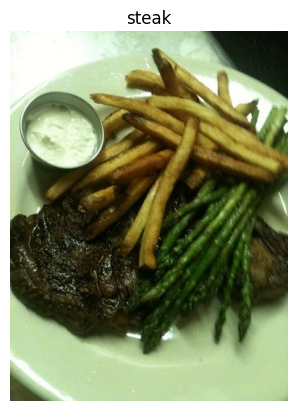

In [ ]:
img= view_random_image(target_dir='pizza_steak/train/',
                       target_class='steak')

In [ ]:
img/255

array([[[0.91764706, 0.98823529, 0.90196078],
        [0.9254902 , 0.99607843, 0.90980392],
        [0.9254902 , 1.        , 0.91372549],
        ...,
        [0.01568627, 0.05490196, 0.02352941],
        [0.01568627, 0.05490196, 0.02352941],
        [0.01568627, 0.05490196, 0.02352941]],

       [[0.92941176, 1.        , 0.91372549],
        [0.9254902 , 0.99607843, 0.90980392],
        [0.91764706, 0.99215686, 0.90588235],
        ...,
        [0.01568627, 0.05490196, 0.02352941],
        [0.01568627, 0.05490196, 0.02352941],
        [0.01568627, 0.05490196, 0.02352941]],

       [[0.92941176, 1.        , 0.91764706],
        [0.92156863, 0.99607843, 0.90980392],
        [0.90980392, 0.98431373, 0.89803922],
        ...,
        [0.01568627, 0.05490196, 0.02352941],
        [0.01176471, 0.05098039, 0.01960784],
        [0.01176471, 0.05098039, 0.01960784]],

       ...,

       [[0.28235294, 0.31764706, 0.19607843],
        [0.2745098 , 0.30980392, 0.18823529],
        [0.27058824, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator(rescale= 1./255)


train_dir = '/content/pizza_steak/train'
valid_dir = '/content/pizza_steak/test'

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    target_size= (224,224),
    class_mode = 'binary',
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    batch_size = 32,
    target_size= (224,224),
    class_mode = 'binary',
    seed=42
)

model_1 =  tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D( filters=10,
                               kernel_size = 3,
                                activation='relu',
                                input_shape =(224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding='valid'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch= len(train_data),
    validation_data= valid_data,
    validation_steps= len(valid_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.6273 - loss: 0.6425 - val_accuracy: 0.7860 - val_loss: 0.4623
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.7923 - loss: 0.4600 - val_accuracy: 0.8460 - val_loss: 0.3778
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.7927 - loss: 0.4367 - val_accuracy: 0.8680 - val_loss: 0.3475
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8083 - loss: 0.4202 - val_accuracy: 0.7880 - val_loss: 0.4382
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8580 - loss: 0.3426 - val_accuracy: 0.8500 - val_loss: 0.3443


In [ ]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)